In [42]:
import pandas as pd
import numpy as np 
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import cross_val_score, 

In [43]:
can = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Cases\Cancer\Cancer.csv")

dum_can = pd.get_dummies(can,drop_first=True)
dum_can.head()

,subjid,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_10 to 14,tumor-size_15 to 19,...,node-caps_yes,deg-malig_three,deg-malig_two,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes,Class_recurrence-events
0,1,False,True,False,False,False,False,True,False,True,...,True,True,False,True,False,True,False,False,False,True
1,2,False,False,True,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,3,False,False,True,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
3,4,False,True,False,False,False,False,True,False,False,...,True,True,False,True,True,False,False,False,True,False
4,5,False,True,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,True,False,True


In [17]:
nb = BernoulliNB( )

X = dum_can.iloc[:,1:-1]
y= dum_can.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=24,stratify =y)
nb.fit(X_train,y_train)

BernoulliNB()

In [25]:
y_pred = nb.predict(X_test)
y_pred

array([ True, False, False, False, False,  True, False, False,  True,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False,  True,
       False, False, False, False, False])

In [22]:
accuracy_score(y_test,y_pred)

0.7790697674418605

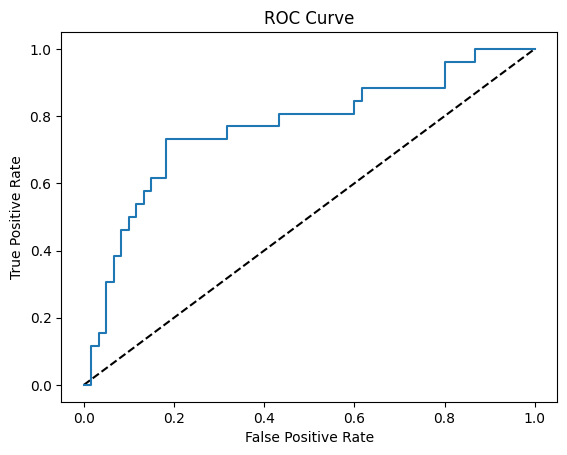

0.7666666666666666
0.5623030780834444


In [29]:
# ROC
# Compute predicted probabilities: y_pred_prob
y_probs = nb.predict_proba(X_test)
y_pred_prob = y_probs[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(roc_auc_score(y_test, y_pred_prob))
print(log_loss(y_test, y_pred_prob))

In [37]:
kfold = StratifiedKFold(n_splits =5,shuffle = True, random_state = 24)
results = cross_val_score(nb,X, y,cv = kfold,scoring = 'accuracy')#scoring is r2 default
print(results.mean())

0.7586206896551724


In [41]:
results = cross_val_score(nb,X, y,cv = kfold,scoring = 'roc_auc')#scoring is r2 default
print(results.mean())

0.7141284074605452


In [40]:
results = cross_val_score(nb,X, y,cv = kfold,scoring = 'neg_log_loss')#scoring is r2 default
print(results.mean())

-0.6132467093440803
